# Clustering data

Let's have a look at some numeric data we can cluster. First, we generate data:

       var1      var2
0 -5.094102  4.863336
1  5.434666  5.106170
2  5.462461  4.260063
3  3.736881  5.354560
4 -4.962616  5.189325


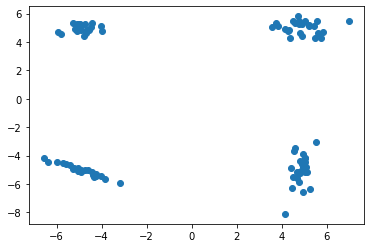

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

np.random.seed(5)

# scikit-learn contains a specific function to create data
# It creates a tuple with X and y matrices
# We create a dataset with 2 independent variables, and a dependent variable with 4 levels/variables
data = make_classification(n_samples=100, n_features=2, 
                              n_informative=2, n_redundant=0, n_repeated=0, n_classes=4, 
                              n_clusters_per_class=1, 
                              class_sep=5.0, shuffle=True, random_state=6)

# Here, we store the X data in a pandas dataframe
X = pd.DataFrame(data = data[0], columns = ['var1','var2'])
print(X.head())

plt.scatter(X['var1'], X['var2'])
plt.show()

## Using k-means

Clustering them is straightforward with scikit-learn:

In [2]:
from sklearn.cluster import KMeans

# First, we create the model with parameters
k_m = KMeans(n_clusters = 5, init="random")

# Next, we fit the data and predict (not really applicable here), but assign cluster labels
k_m.fit_predict(X)

# The k_m object stores both the labels and clusters, which can be accessed like this:
print(k_m.labels_)
print(k_m.cluster_centers_)

[2 1 1 1 2 1 1 4 4 2 2 3 2 2 0 3 3 3 1 4 3 1 3 2 3 4 1 2 4 1 3 4 1 1 3 2 0
 3 2 1 2 2 3 2 3 0 1 1 3 1 2 3 2 1 3 3 1 2 4 2 4 1 4 3 4 4 1 1 3 2 4 0 4 2
 3 2 1 3 1 1 0 3 4 2 4 4 2 2 3 4 4 4 2 3 3 1 3 4 1 2]
[[ 4.72668371 -6.63321204]
 [ 4.89304848  5.03066823]
 [-4.89499814  4.97538489]
 [-4.92231262 -5.03246372]
 [ 4.86838228 -4.62419314]]


Let's now visualise the clusters along the dimensions of these two variables:

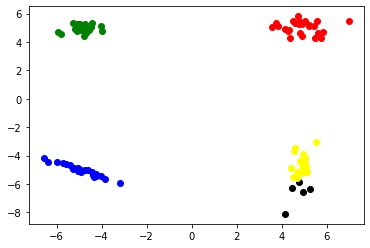

In [3]:
# We use a dictionary to map our labels (clusters) to colours
colours = {0 : 'black', 1 : 'red', 2: 'green', 3: 'blue', 4: 'yellow'}

# We loop the rows in the dataset (which returns a tuple of an index and observation)
# as well as the cluster labels and colour the observations accordingly
for (index, obs), label in zip(X.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = colours[label])
plt.show()

Notice that we have more clusters than we actually need. The one in the lower left corner is split in two unnecessarily.

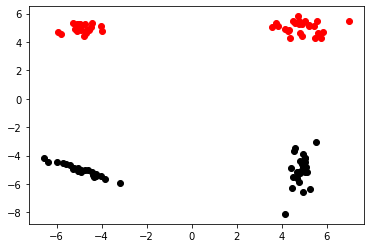

In [4]:
k_m = KMeans(n_clusters = 2, init="random")
k_m.fit_predict(X)
for (index, obs), label in zip(X.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = colours[label])
plt.show()

However, two clusters would not be enough. The outcome seems arbitrary, as we could have also put the lower left corner in the red cluster, and the upper right in the black one.

## A different dataset

Let's look at data that is closer (parameter ```class_sep``` is lower) together:

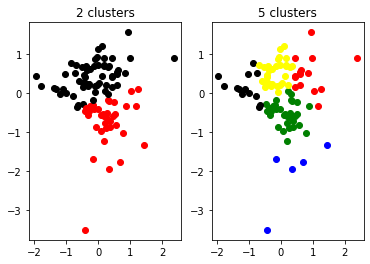

In [5]:
data = make_classification(n_samples=100, n_features=2, 
                              n_informative=2, n_redundant=0, n_repeated=0, n_classes=4, 
                              n_clusters_per_class=1, 
                              class_sep=0.4, shuffle=True, random_state=6)

X = pd.DataFrame(data = data[0], columns = ['var1','var2'])


plt.subplot(1, 2, 1) 
k_m = KMeans(n_clusters = 2, init="random")
k_m.fit_predict(X)
for (index, obs), label in zip(X.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = colours[label])
plt.title('2 clusters')
    
plt.subplot(1, 2, 2) 
k_m = KMeans(n_clusters = 5, init="random")
k_m.fit_predict(X)
for (index, obs), label in zip(X.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = colours[label])
plt.title('5 clusters')
plt.show()

There are no clearly delineated clusters. Nevertheless, each cluster has its own region which might make sense in some way. For example, the blue ones might represent people that spend very little (var 1 is low) on fair-priced products (medium value for var 2), while the green ones spend average (medium value for var 1), but only on cheap products (values for var 2 is low). 

## Determining the number of clusters

Determining the number of clusters to use can be done in numerous ways, as explained earlier. Later, you will learn about the sum of squared errors (SSE) which can be used to quantify the distance between points in a cluster and its centroid. This can be used to plot the decrease over the number of clusters to see whether there is still extra error reduction by introducing more clusters:

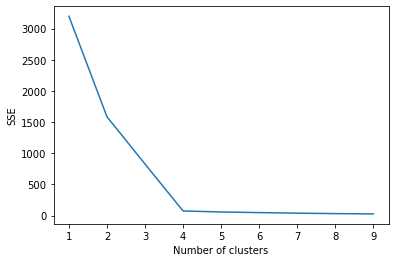

In [6]:
data = make_classification(n_samples=100, n_features=2, 
                              n_informative=2, n_redundant=0, n_repeated=0, n_classes=4, 
                              n_clusters_per_class=1, 
                              class_sep=4, shuffle=True, random_state=6)
X = pd.DataFrame(data = data[0], columns = ['var1','var2'])

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=20).fit(X)
    
    # Inertia is the distance of each observation to its closest centroid
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

Do you notice how the SSE does not change much after 4 clusters? There is a clear point in the curve where it starts to flatten. Finding this point is called the elbow method.

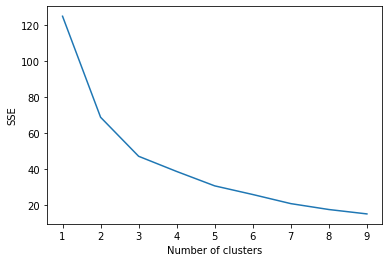

In [7]:
data = make_classification(n_samples=100, n_features=2, 
                              n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, 
                              n_clusters_per_class=1, 
                              class_sep=0.4, shuffle=True, random_state=6)
X = pd.DataFrame(data = data[0], columns = ['var1','var2'])

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=20).fit(X)
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In this case, with only two generated clusters (```n_classes = 2```), there is a less pronounced elbow point, as the separation (```class_sep```) is low.

## Visualisation

On a side note, it might be a good time to learn about colour maps as well. They come in handy when we need to convert numbers into colours for visualisation purposes:

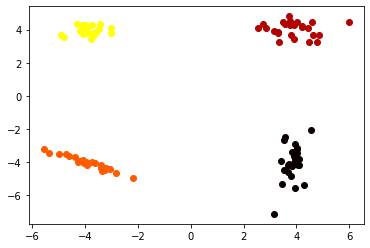

In [8]:
import matplotlib as mpl
import matplotlib.cm as cm

# Creating data
data = make_classification(n_samples=100, n_features=2, 
                              n_informative=2, n_redundant=0, n_repeated=0, n_classes=4, 
                              n_clusters_per_class=1, 
                              class_sep=4, shuffle=True, random_state=6)

X = pd.DataFrame(data = data[0], columns = ['var1','var2'])

# 4-means clustering
no_clusters = 4
k_m = KMeans(n_clusters = no_clusters, init="random")
k_m.fit_predict(X)

# We normalize the range of our labels so they are mapped to colour codes
norm = mpl.colors.Normalize(vmin=0, vmax= no_clusters)

# We import a colour map, in this case with 'hot'/reddish colours
cmap = cm.hot

# This object allows us to map our normalised values along the colour map
m = cm.ScalarMappable(norm=norm, cmap=cmap)

# Now, we can apply the same loop, but using the ScalarMappable object:
for (index, obs), label in zip(X.iterrows(), k_m.labels_):
    plt.scatter(obs['var1'], obs['var2'], color = m.to_rgba(label))
plt.show()